In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches
from tqdm import tqdm
%matplotlib inline

train_path = '../train/train.csv'
test_path = '../test/test.csv'
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
train_df.head()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,1,8.0,0.18,0.37,1.3,0.040,15.0,96.0,0.99120,3.06,0.61,12.1,white,6
1,2,7.5,0.38,0.29,4.9,0.021,38.0,113.0,0.99026,3.08,0.48,13.0,white,7
2,3,6.1,0.27,0.33,2.2,0.021,26.0,117.0,0.98860,3.12,0.30,12.5,white,6
3,4,6.4,0.32,0.50,10.7,0.047,57.0,206.0,0.99680,3.08,0.60,9.4,white,5
4,5,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,red,7


In [3]:
word_to_num = {'white' : 0, 'red' : 1}
train_df['type'] = train_df['type'].replace(word_to_num)
train_df

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,1,8.0,0.18,0.37,1.30,0.040,15.0,96.0,0.99120,3.06,0.61,12.1,0,6
1,2,7.5,0.38,0.29,4.90,0.021,38.0,113.0,0.99026,3.08,0.48,13.0,0,7
2,3,6.1,0.27,0.33,2.20,0.021,26.0,117.0,0.98860,3.12,0.30,12.5,0,6
3,4,6.4,0.32,0.50,10.70,0.047,57.0,206.0,0.99680,3.08,0.60,9.4,0,5
4,5,8.4,0.37,0.43,2.30,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,3227,6.4,0.16,0.31,5.30,0.043,42.0,157.0,0.99455,3.35,0.47,10.5,0,5
3227,3228,6.4,0.18,0.28,17.05,0.047,53.0,139.0,0.99724,3.25,0.35,10.5,0,6
3228,3229,6.0,0.28,0.25,1.80,0.042,8.0,108.0,0.99290,3.08,0.55,9.0,0,5
3229,3230,7.7,0.28,0.29,6.90,0.041,29.0,163.0,0.99520,3.44,0.60,10.5,0,6


In [4]:
import numpy as np

def outliers_iqr(data):
    q1,q3 = np.percentile(data,[25,75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    return np.where((data > upper_bound) | (data < lower_bound))

In [5]:
drop_columns = ['id','type','quality']

box_df = train_df.drop(drop_columns,axis=1)

  0%|                                                                                           | 0/11 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments wit

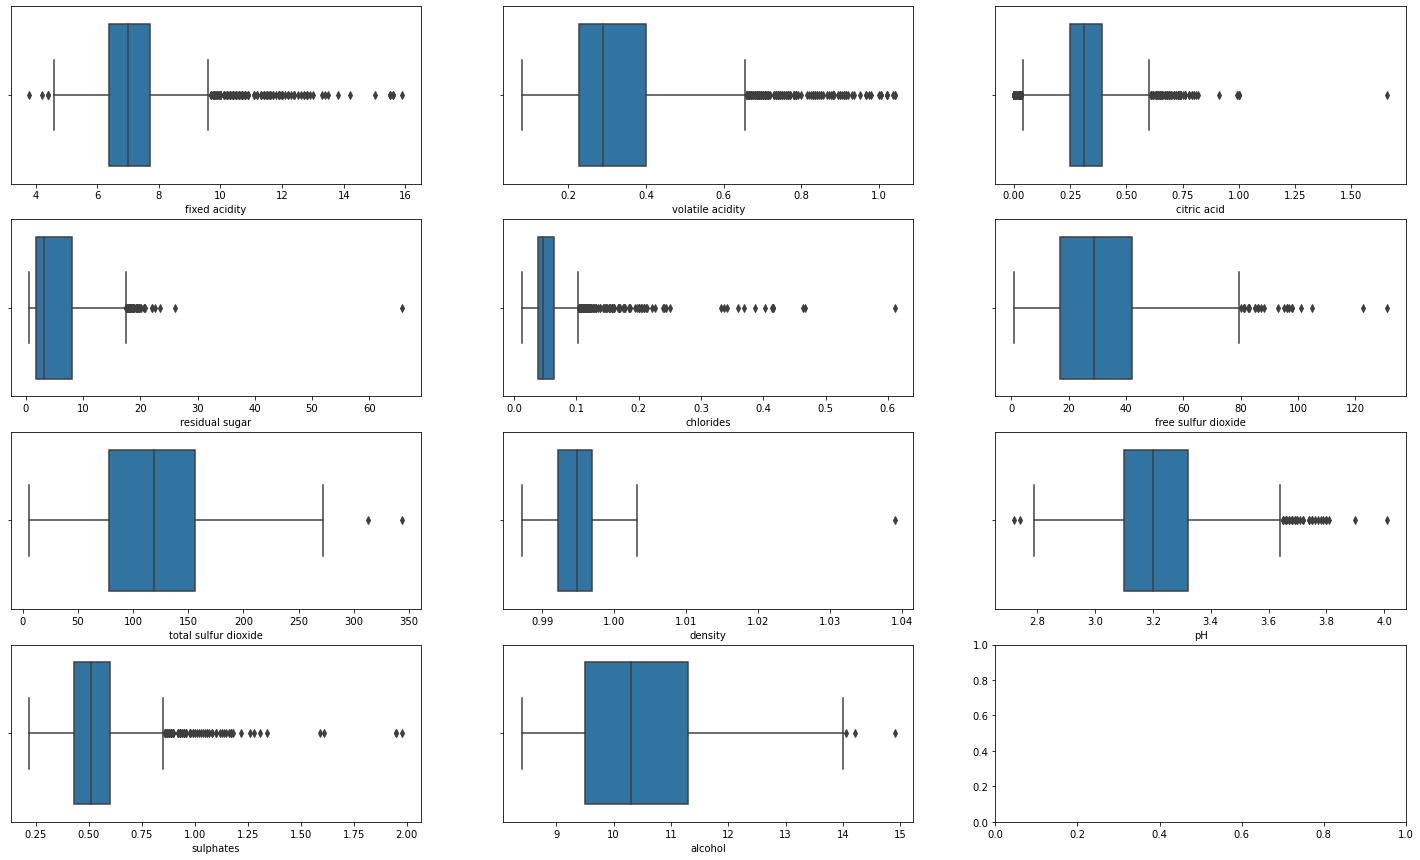

In [6]:
fig,axes = plt.subplots(4,3,figsize=(25,15))

ax = axes.flatten()

for i in tqdm(range(len(box_df.columns))):
    sns.boxplot(box_df.iloc[:,i],ax=ax[i]) 
plt.show()

이상치를 일괄적으로 삭제하기에는 분포가 어느정도 있는 컬럼이 보인다 (ex : sulphates)  
그러므로 차이가 많이 나는 이상치만 삭제하는 방법은 어떨까?  
sulphates를 예로 들면 1.5 이상의 이상치만 삭제한다던지의 방법  

In [7]:
box_df['residual sugar'].max()

65.8

In [10]:
from scipy import stats
zscore_df = box_df.apply(stats.zscore)
zscore_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.613164,-0.973871,0.346320,-0.862826,-0.444893,-0.896417,-0.363344,-1.135570,-0.952533,0.524814,1.342873
1,0.227151,0.274102,-0.202257,-0.115217,-0.976867,0.426604,-0.058413,-1.443438,-0.828960,-0.343803,2.096877
2,-0.853685,-0.412283,0.072032,-0.675924,-0.976867,-0.263668,0.013335,-1.987120,-0.581815,-1.546504,1.677986
3,-0.622077,-0.100290,1.237759,1.089263,-0.248903,1.519535,1.609735,0.698538,-0.828960,0.457997,-0.919137
4,0.921975,0.211703,0.757754,-0.655157,0.199075,-1.068985,-1.744499,0.272763,-0.272884,1.861148,0.588870
...,...,...,...,...,...,...,...,...,...,...,...
3226,-0.622077,-1.098668,-0.065113,-0.032150,-0.360897,0.656695,0.730818,-0.038380,0.839268,-0.410620,0.002423
3227,-0.622077,-0.973871,-0.270829,2.407962,-0.248903,1.289444,0.407951,0.842646,0.221405,-1.212420,0.002423
3228,-0.930887,-0.349884,-0.476546,-0.758992,-0.388896,-1.299076,-0.148099,-0.578787,-0.828960,0.123914,-1.254250
3229,0.381557,-0.349884,-0.202257,0.300121,-0.416894,-0.091100,0.838440,0.174507,1.395344,0.457997,0.002423


In [11]:
zscore_drop_df = zscore_df
for i in zscore_df.columns:
    zscore_drop_df = zscore_drop_df[(zscore_drop_df[i] > -2) & (zscore_drop_df[i] < 2)]
zscore_drop_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.613164,-0.973871,0.346320,-0.862826,-0.444893,-0.896417,-0.363344,-1.135570,-0.952533,0.524814,1.342873
2,-0.853685,-0.412283,0.072032,-0.675924,-0.976867,-0.263668,0.013335,-1.987120,-0.581815,-1.546504,1.677986
3,-0.622077,-0.100290,1.237759,1.089263,-0.248903,1.519535,1.609735,0.698538,-0.828960,0.457997,-0.919137
4,0.921975,0.211703,0.757754,-0.655157,0.199075,-1.068985,-1.744499,0.272763,-0.272884,1.861148,0.588870
5,-0.930887,-0.037891,0.414893,0.881594,-0.444893,-0.091100,0.138894,0.240011,1.580702,-0.343803,0.421313
...,...,...,...,...,...,...,...,...,...,...,...
3224,0.690367,-0.849074,1.169187,1.317699,-0.220904,0.886786,1.717357,0.698538,-0.767174,-0.477437,-0.416468
3226,-0.622077,-1.098668,-0.065113,-0.032150,-0.360897,0.656695,0.730818,-0.038380,0.839268,-0.410620,0.002423
3228,-0.930887,-0.349884,-0.476546,-0.758992,-0.388896,-1.299076,-0.148099,-0.578787,-0.828960,0.123914,-1.254250
3229,0.381557,-0.349884,-0.202257,0.300121,-0.416894,-0.091100,0.838440,0.174507,1.395344,0.457997,0.002423


  0%|                                                                                           | 0/11 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments wit

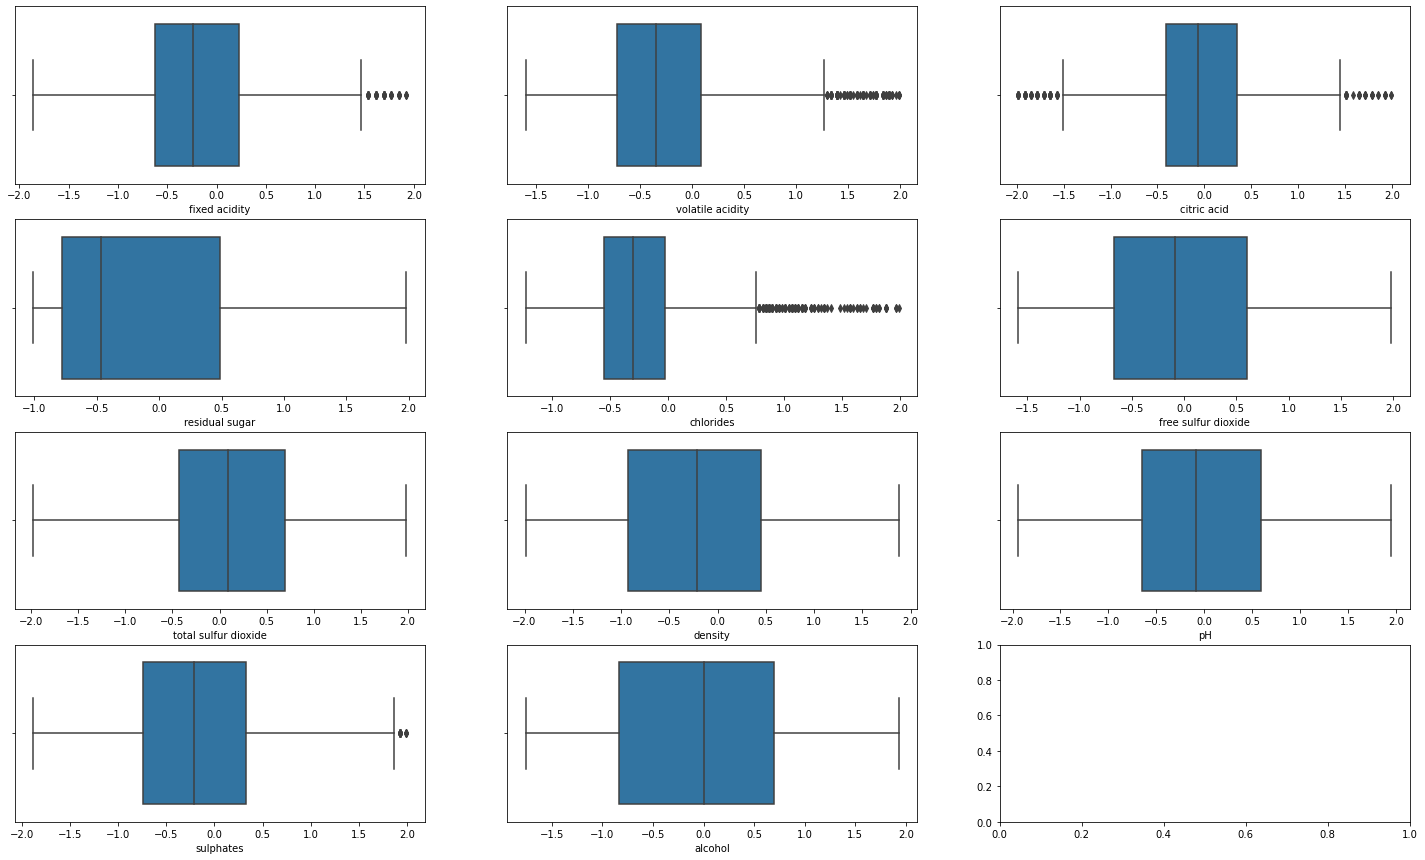

In [12]:
fig,axes = plt.subplots(4,3,figsize=(25,15))

ax = axes.flatten()

for i in tqdm(range(len(box_df.columns))):
    sns.boxplot(zscore_drop_df.iloc[:,i],ax=ax[i]) 
plt.show()

각 데이터의 scale이 다르므로 z-score 정규화 하여 이상치를 제거  
분석후, 결과가 너무 좋지 않을 경우 Min-Max scal